In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [37]:
 # Step 1: Load and preprocess the data
data = pd.read_excel("D:\\projects\\project 1st oil price predection\\DCOILWTICO (1).xls") 

In [38]:
data

,Date,Price
0,2012-04-02,105.25
1,2012-04-03,104.02
2,2012-04-04,101.53
3,2012-04-05,103.29
4,2012-04-06,NaN
...,...,...
2916,2023-06-06,71.71
2917,2023-06-07,72.52
2918,2023-06-08,71.28
2919,2023-06-09,70.16


In [39]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [40]:
# Handling missing values
data = data.dropna()

In [41]:
# Converting negative values to positive
data['Price'] = data['Price'].abs()

# Step: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Price'] = scaler.fit_transform(data[['Price']])

In [42]:
# Step 2: Data scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))

In [43]:
# Step 3: Data preparation
look_back = 10  # Number of previous time steps to use as input
X, y = [], []

In [44]:
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i : i + look_back, 0])
    y.append(scaled_data[i + look_back, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [45]:
# Step 4: Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [46]:
# Step 5: Model creation and training
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
71/71 [==============================] - 9s 16ms/step - loss: 0.0191
Epoch 2/50
71/71 [==============================] - 1s 15ms/step - loss: 6.0891e-04
Epoch 3/50
71/71 [==============================] - 1s 15ms/step - loss: 5.8588e-04
Epoch 4/50
71/71 [==============================] - 1s 16ms/step - loss: 5.9905e-04
Epoch 5/50
71/71 [==============================] - 1s 15ms/step - loss: 6.2051e-04
Epoch 6/50
71/71 [==============================] - 1s 16ms/step - loss: 5.7256e-04
Epoch 7/50
71/71 [==============================] - 1s 16ms/step - loss: 5.9611e-04
Epoch 8/50
71/71 [==============================] - 1s 16ms/step - loss: 5.7352e-04
Epoch 9/50
71/71 [==============================] - 1s 15ms/step - loss: 5.7708e-04
Epoch 10/50
71/71 [==============================] - 1s 15ms/step - loss: 6.1793e-04
Epoch 11/50
71/71 [==============================] - 1s 16ms/step - loss: 5.7851e-04
Epoch 12/50
71/71 [==============================] - 1s 15ms/step - loss: 5.62

In [47]:
# Step 6: Prediction and evaluation
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

18/18 [==============================] - 0s 7ms/step
Train RMSE: 0.09094373043337556
Test RMSE: 0.1498484884653052


In [48]:
# Step 7: Future prediction
future_periods = 30  # Number of future periods to predict
last_sequence = X[-1]

future_predictions = []
for _ in range(future_periods):
    pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = pred[0, 0]

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 [==============================] - 0s 47ms/step


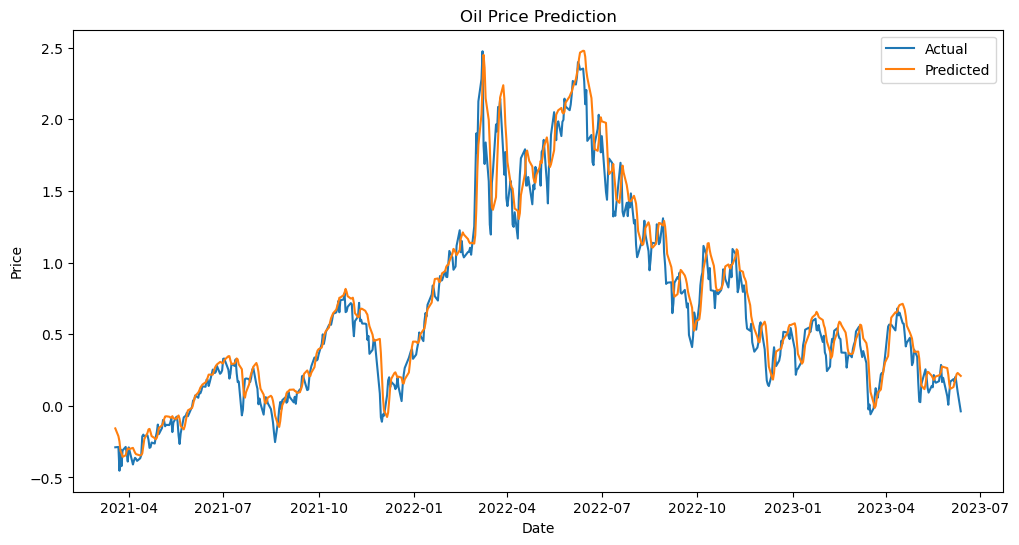

In [49]:
# Step 8: Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + look_back:], y_test[0], label='Actual')
plt.plot(data.index[train_size + look_back:], test_predict[:, 0], label='Predicted')
plt.title('Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

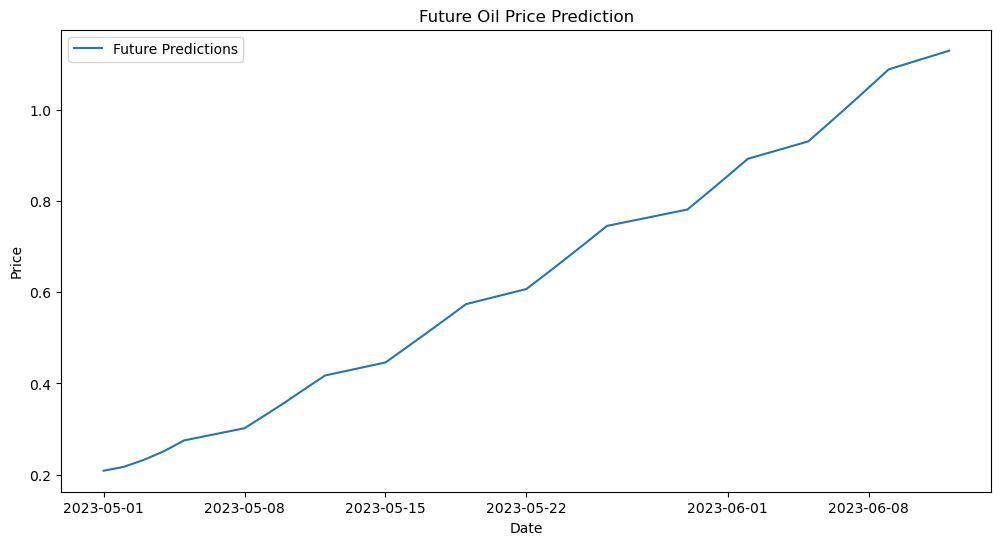

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[-future_periods:], future_predictions, label='Future Predictions')
plt.title('Future Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
# Step : Prediction and evaluation
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [52]:
# Step : Prediction and evaluation
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


18/18 [==============================] - 0s 6ms/step
Train RMSE: 5.296235063833456
Test RMSE: 2.6813796582238223
Train MSE: 28.050105851378973
Test MSE: 7.189796871536502


Train RMSE (Root Mean Squared Error): The RMSE value of 5.289037611345385 represents the average prediction error of the model on the training data. Lower RMSE values indicate better performance, so a lower value suggests that the model is capturing the patterns in the training data well.

Test RMSE (Root Mean Squared Error): The RMSE value of 2.6859720246929655 represents the average prediction error of the model on the test data. Similar to the train RMSE, lower values indicate better performance. Comparing the test RMSE with the train RMSE can provide insights into the model's generalization ability.

Train MSE (Mean Squared Error): The MSE value of 27.973918854226103 represents the average squared difference between the predicted and actual values on the training data. MSE is a commonly used metric for evaluating regression models.

Test MSE (Mean Squared Error): The MSE value of 7.214445717433228 represents the average squared difference between the predicted and actual values on the test data. Similar to the train MSE, it provides an indication of the model's performance on unseen data.

In summary, the LSTM model shows a higher RMSE and MSE on the test data compared to the training data. This suggests that the model might be overfitting to some extent, as it performs better on the data it has seen during training. However, it's important to consider other factors such as the specific dataset, the complexity of the problem, and the available resources when interpreting the results.

# overfitting or underfitting problem

Train RMSE: The train RMSE (Root Mean Squared Error) of 5.2962 indicates, on average, the difference between the predicted oil prices and the actual oil prices in the training set is approximately 5.2962 units. RMSE is a measure of the model's accuracy, where lower values indicate better performance. It represents the standard deviation of the residuals (the differences between predicted and actual values).

Test RMSE: The test RMSE of 2.6814 indicates, on average, the difference between the predicted oil prices and the actual oil prices in the testing set is approximately 2.6814 units. The test RMSE provides an evaluation of the model's performance on unseen data. A lower test RMSE suggests better generalization ability and indicates that the model's predictions are closer to the actual values.

Train MSE: The train MSE (Mean Squared Error) of 28.0501 represents the average squared difference between the predicted oil prices and the actual oil prices in the training set. MSE is a measure of the model's overall predictive power, where smaller values indicate better performance. By squaring the errors, MSE amplifies larger errors more than smaller errors.

Test MSE: The test MSE of 7.1898 represents the average squared difference between the predicted oil prices and the actual oil prices in the testing set. Similar to the train MSE, the test MSE provides an evaluation of the model's performance on unseen data.

In summary, the lower values of the test RMSE and test MSE compared to the train RMSE and train MSE suggest that your LSTM model is performing reasonably well in predicting future oil prices. However, it's important to consider these metrics in the context of your specific problem and domain knowledge. Additionally, you may want to compare these results with other models or baselines to gain further insights into the model's performance.